In [1]:
import cv2
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree
import os
import matplotlib.pyplot as plt


In [2]:
# Example usage
im = cv2.imread(os.path.relpath('../../Data/Coins2.png'), cv2.IMREAD_COLOR)
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)


In [3]:
def MST(im,threshold):

    if(len(im.shape)==2):
        im=np.expand_dims(im,2)

    # Create graph
    rows = im.shape[0]
    cols = im.shape[1]
    num_pixels = rows * cols

    horzedges=np.sqrt((im[:,:-1,0]-im[:,1:,0])**2+(im[:,:-1,1]-im[:,1:,1])**2+(im[:,:-1,2]-im[:,1:,2])**2)
    vertedges=np.sqrt((im[:-1,:,0]-im[1:,:,0])**2+(im[:-1,:,1]-im[1:,:,1])**2+(im[:-1,:,2]-im[1:,:,2])**2)

    position_idx = np.reshape(np.linspace(0,num_pixels-1,num_pixels),(rows,cols))

    data = np.concatenate((horzedges.reshape(-1),vertedges.reshape(-1)))
    startpos = np.concatenate((position_idx[:,:-1].reshape(-1),position_idx[:-1,:].reshape(-1)))
    endpos = np.concatenate((position_idx[:,1:].reshape(-1),position_idx[1:,:].reshape(-1)))

    graph = csr_matrix((data, (startpos, endpos)),shape=(num_pixels, num_pixels))

    # Compute MST
    mst = minimum_spanning_tree(graph)
    mst=mst.tocoo()  # This turns the sparse matrix into data, rows, columns

    # Segment image
    segments = np.zeros(num_pixels, dtype=np.uint8)

    #dMST = mst.data
    #rMST = mst.row
    #cMST = mst.col

    label = 0
    for i, j in zip(mst.row, mst.col):
        if mst.data[label] <= threshold:
            segments[j] = segments[i]
        else:
            segments[j] = segments[i] + 1
        label += 1

    return segments.reshape((rows,cols))


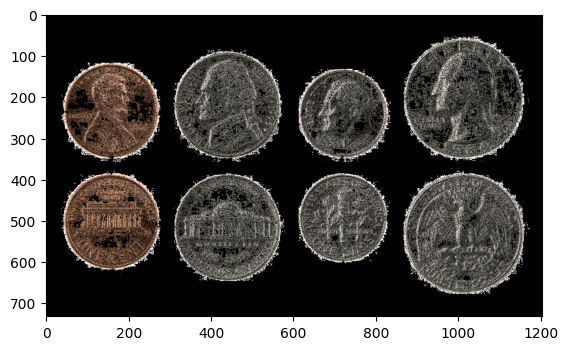

In [5]:
mask = MST(np.float32(im),2)

im[:,:,0]=im[:,:,0]*(mask>0)
im[:,:,1]=im[:,:,1]*(mask>0)
im[:,:,2]=im[:,:,2]*(mask>0)


plt.imshow(im)